<a href="https://colab.research.google.com/github/JCaballerot/Machine_learning_program/blob/main/Supervised_models/Logistic_regression/Lab_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1 align=center><font size = 5>Titanic - Machine Learning from Disaster</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Titanic Problem</a>  
4. <a href="#item34">Análisis y tratamiento de variables</a>  
5. <a href="#item34">Regresión Logística</a>  
6. <a href="#item34">Elastic Net</a>  

</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir un modelo de regresión logística.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de regresión logística.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

## Descargar y limpiar Dataset


Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [19]:

# Scikit-Learn 
import sklearn

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Esta es la legendaria competencia Titanic ML



El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado "insumergible", se hundió tras chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y la tripulación.

Si bien hubo algún elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, le pedimos que cree un modelo predictivo que responda a la pregunta: "¿Qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

<img src="https://storage.googleapis.com/kaggle-media/welcome/video_thumbnail.jpg" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Qué tipo de personas tenían más probabilidades de sobrevivir? </div>


<b>Descripción de datos</b>

El data frame de Titanic tiene 891 filas y 12 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>Survival : </b>  Supervivencia (0 = No, 1 = Sí)
* <b>Pclass : </b>  Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* <b>Sex : </b>  Sexo 
* <b>Age : </b>  Edad en años
* <b>Sibsp : </b>  # de hermanos / cónyuges a bordo del Titanic
* <b>Parch : </b>  # de padres / hijos a bordo del Titanic

* <b>Ticket : </b>  Número de ticket

* <b>Fare : </b>  Tarifa de pasajero
* <b>Cabin : </b>  Número de cabina
* <b>Embarked : </b>  Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton)



---


<strong>Puede consultar este [link](https://www.kaggle.com/c/titanic/overview) para leer más sobre la fuente de datos Titanic.</strong>


## Descargar y limpiar Dataset


In [20]:
# Cargar Data
data = pd.read_csv("train_titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data.shape

(891, 12)

In [22]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [23]:
# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})


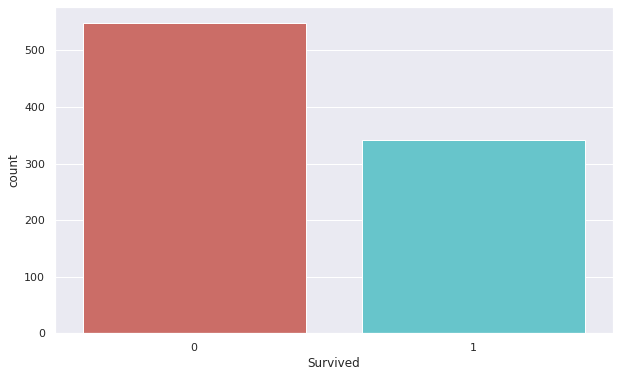

In [24]:
# Analizando el target 
sns.countplot(x='Survived', data = data, palette = 'hls')

## Análisis de variables categóricas

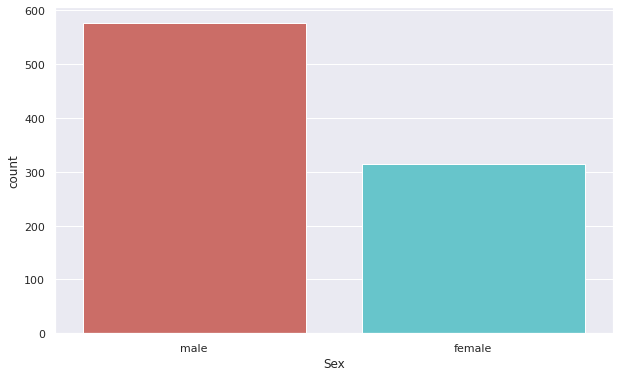

In [25]:
# Analizando variable categórica
sns.countplot(x='Sex', data = data, palette = 'hls')

In [26]:
data.groupby(['Sex']).agg({"PassengerId":"count",
                           "Survived" :"mean"}).reset_index()

,Sex,PassengerId,Survived
0,female,314,0.742038
1,male,577,0.188908


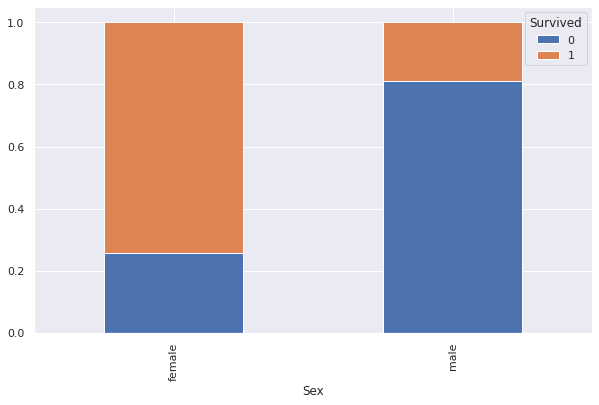

In [27]:

table = pd.crosstab(data.Sex,data.Survived)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

## Análisis de variables numéricas

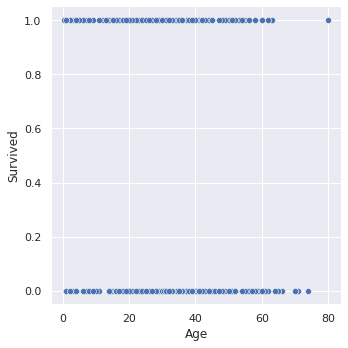

In [28]:
sns.relplot(data=data, x="Age", y="Survived")


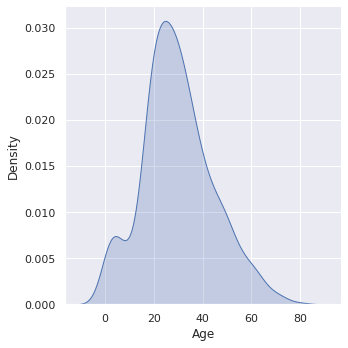

In [29]:
# Analizando variable numérica
sns.displot(data, x="Age",kind="kde", fill=True)

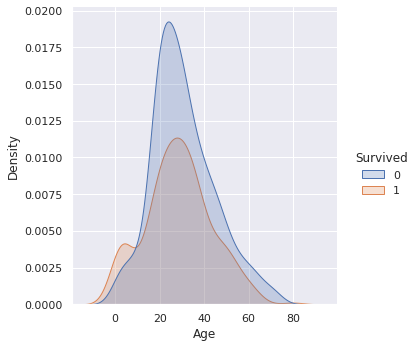

In [30]:
sns.displot(data, x="Age", hue='Survived', kind="kde", fill=True)

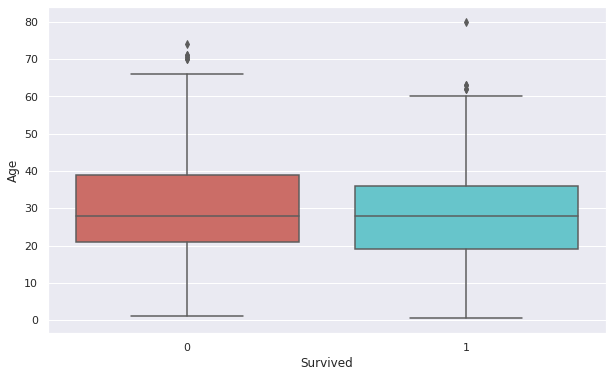

In [31]:
ax = sns.boxplot(x="Survived", y="Age", data=data, palette = 'hls')

In [32]:
data['Fare'].fillna(data['Fare'].mean())

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [33]:
data['Fare'].apply(lambda x: 1 if x < 100 else 2)




0      1
1      1
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    1
890    1
Name: Fare, Length: 891, dtype: int64

In [34]:
# Discretizar variable 

from sklearn.preprocessing import KBinsDiscretizer

data['Age_cat'] = KBinsDiscretizer(n_bins = 6, 
                                   encode = 'ordinal',
                                   strategy = "quantile").fit_transform(data[['Age']].fillna(data[['Age']].mean()))


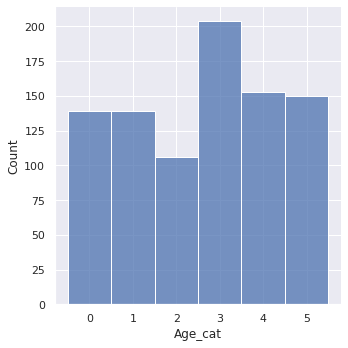

In [35]:
sns.displot(data['Age_cat'], palette = 'hls', discrete=True)

In [36]:
data[['Age', 'Age_cat', 'Survived']]

,Age,Age_cat,Survived
0,22.0,1.0,0
1,38.0,4.0,1
2,26.0,2.0,1
3,35.0,4.0,1
4,35.0,4.0,0
...,...,...,...
886,27.0,2.0,0
887,19.0,1.0,1
888,NaN,3.0,0
889,26.0,2.0,1


In [37]:
data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Age_cat']

In [38]:
aggregations = {'Survived':'mean', 'PassengerId':'count'}
res = data.groupby('Age_cat').agg(aggregations).reset_index()

In [39]:
res.head(10)

,Age_cat,Survived,PassengerId
0,0.0,0.503597,139
1,1.0,0.345324,139
2,2.0,0.358491,106
3,3.0,0.303922,204
4,4.0,0.450980,153
5,5.0,0.366667,150


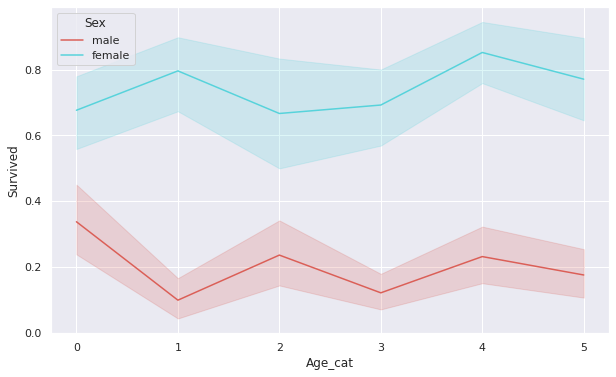

In [40]:
# Ratio del evento por tramo dela variable numérica
sns.lineplot(data=data, x="Age_cat", y="Survived", palette = 'hls', hue = 'Sex')

## Análisis multivariado

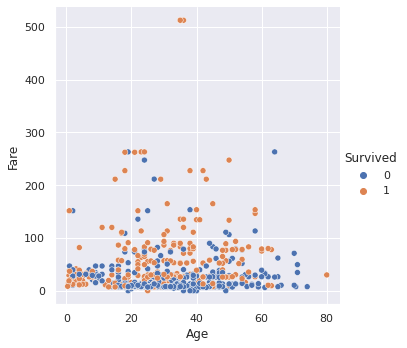

In [41]:
sns.relplot(data=data, x="Age", y="Fare", hue="Survived")


## Tratamiento de variables

In [42]:
#Variables 

numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']


In [43]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Age_cat        float64
dtype: object

In [44]:
data['Pclass'] = data['Pclass'].astype('object')

In [45]:
data[catFeatures].head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


## Encoding de variables categóricas


---

<h3>Label Encoding</h3> 

El label encoding consiste en asignar un número (por lo general entero) a cada una de las categorías de la variable categórica.

<img src="https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">



---

<h3>One Hot Encoding</h3> 

El One hot encoding es un proceso que consiste en dummizar cada catgoría de la variable en una nueva variable, de esta manera las nuevas variables se activarán dependiendo del valor que tome la variable original.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTr11qA6j0WCbEYrfNoQ7QO_NpMIZus42BJwQ&usqp=CAU" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">

---

<div style="text-align: center">Ejemplo de one hot Encoding </div>

<h3>Target Encoding</h3> 

El target encoding es una técnica que consiste en inputar el promedio del target a cada uno de los valores de la variable categórica.

<img src="https://lh6.googleusercontent.com/6_KrGj2k9NvcLVfmZ6HIYruAqav4rX86YU7WOhXofDGd6-98JjUPWajo0dDqmFMXv3tN0b_LOmgYLiPMCFyIWw3b7lVrCAiSboWgJ_AJ4TqHpNWUHkgIxl0xuSF9JdSXNbWG48QS" alt="HTML5 Icon" style="width: 600px; height: 450px;">

---


In [46]:
# Tratamiento de variables categóricas

data.Sex.drop_duplicates()


0      male
1    female
Name: Sex, dtype: object

In [47]:
data[catFeatures].fillna('missing', inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [48]:
data[catFeatures].drop_duplicates().head(20)

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
5,3,male,Q
6,1,male,S
9,2,female,C
15,2,female,S
17,2,male,S
19,3,female,C


In [49]:
# Reemplazar las filas NaN por una categoría específica para missings 
for c in catFeatures:
  data[c] = data[c].replace(np.nan,'missing')

data[catFeatures].drop_duplicates()


,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
5,3,male,Q
6,1,male,S
9,2,female,C
15,2,female,S
17,2,male,S
19,3,female,C


<h3>One Hot Encoding</h3> 

In [50]:
#sklearn.preprocessing

In [51]:
# One hot Encoding

from sklearn.preprocessing import OneHotEncoder

OneHotEncoder = OneHotEncoder()

dummyCols = ['Embarked_dum' + str(x) for x in range(len(data['Embarked'].drop_duplicates()))]
data[dummyCols] = OneHotEncoder.fit_transform(data[['Embarked']]).toarray()
data[['Embarked'] + dummyCols].head(10)


,Embarked,Embarked_dum0,Embarked_dum1,Embarked_dum2,Embarked_dum3
0,S,0.0,0.0,1.0,0.0
1,C,1.0,0.0,0.0,0.0
2,S,0.0,0.0,1.0,0.0
3,S,0.0,0.0,1.0,0.0
4,S,0.0,0.0,1.0,0.0
5,Q,0.0,1.0,0.0,0.0
6,S,0.0,0.0,1.0,0.0
7,S,0.0,0.0,1.0,0.0
8,S,0.0,0.0,1.0,0.0
9,C,1.0,0.0,0.0,0.0


<h3>Target Encoding</h3> 

In [52]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.5 MB/s 


In [53]:
# Target Encoding

from category_encoders import TargetEncoder
encoder = TargetEncoder()

data[[x + '_num' for x in catFeatures]] = encoder.fit_transform(data[catFeatures], data['Survived'])


/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [54]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat,Embarked_dum0,Embarked_dum1,Embarked_dum2,Embarked_dum3,Pclass_num,Sex_num,Embarked_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0,0.0,1.0,0.0,0.242363,0.188908,0.336957
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.0,1.0,0.0,0.0,0.0,0.629630,0.742038,0.553571
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0,0.0,0.0,1.0,0.0,0.242363,0.742038,0.336957
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4.0,0.0,0.0,1.0,0.0,0.629630,0.742038,0.336957
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,4.0,0.0,0.0,1.0,0.0,0.242363,0.188908,0.336957


In [55]:
data[['Sex','Sex_num']].drop_duplicates()


,Sex,Sex_num
0,male,0.188908
1,female,0.742038


In [56]:
data[['Pclass','Pclass_num']].drop_duplicates()


,Pclass,Pclass_num
0,3,0.242363
1,1,0.629630
9,2,0.472826


In [57]:
data[numFeatures]


,Age,Fare,SibSp,Parch
0,22.0,7.2500,1,0
1,38.0,71.2833,1,0
2,26.0,7.9250,0,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,0
888,NaN,23.4500,1,2
889,26.0,30.0000,0,0


## Tratamiento de variables numéricas




In [58]:
# Tratamiento de outliers

p1 = data.Age.quantile(0.01)
p99 = data.Age.quantile(0.99)

data['Age'] = np.where(data['Age'] < p1, p1, data['Age'])
data['Age'] = np.where(data['Age'] > p99, p99, data['Age'])


In [59]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.000000,223.500000,446.000000,668.500000,891.000000
Survived,891.0,0.383838,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Age,714.0,29.637899,14.343017,1.000000,20.125000,28.000000,38.000000,65.870000
SibSp,891.0,0.523008,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.0,0.381594,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.0,32.204208,49.693429,0.000000,7.910400,14.454200,31.000000,512.329200
Age_cat,891.0,2.609428,1.686057,0.000000,1.000000,3.000000,4.000000,5.000000
Embarked_dum0,891.0,0.188552,0.391372,0.000000,0.000000,0.000000,0.000000,1.000000
Embarked_dum1,891.0,0.086420,0.281141,0.000000,0.000000,0.000000,0.000000,1.000000
Embarked_dum2,891.0,0.722783,0.447876,0.000000,0.000000,1.000000,1.000000,1.000000


In [60]:
# Trataiento de missings

data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())


In [61]:
data[[x + '_t' for x in numFeatures]].head(30)

,Age_t,Fare_t,SibSp_t,Parch_t
0,22.0,7.2500,1,0
1,38.0,71.2833,1,0
2,26.0,7.9250,0,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0
5,28.0,8.4583,0,0
6,54.0,51.8625,0,0
7,2.0,21.0750,3,1
8,27.0,11.1333,0,2
9,14.0,30.0708,1,0


In [62]:
data.corr()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Age_cat,Embarked_dum0,Embarked_dum1,Embarked_dum2,Embarked_dum3,Pclass_num,Sex_num,Embarked_num,Age_t,Fare_t,SibSp_t,Parch_t
PassengerId,1.000000e+00,-0.005007,0.035620,-0.057527,-0.001652,0.012658,0.045411,-0.001205,-0.033606,0.022148,-6.756184e-19,0.034401,-0.042939,-0.006930,0.033085,0.012658,-0.057527,-0.001652
Survived,-5.006661e-03,1.000000,-0.077124,-0.035322,0.081629,0.257307,-0.043037,0.168240,0.003650,-0.155660,6.009485e-02,0.339817,0.543351,0.181814,-0.064941,0.257307,-0.035322,0.081629
Age,3.562047e-02,-0.077124,1.000000,-0.310102,-0.189613,0.097782,0.917737,0.036415,-0.024159,-0.031998,7.529418e-02,0.364313,-0.091103,0.055134,1.000000,0.097782,-0.310102,-0.189613
SibSp,-5.752683e-02,-0.035322,-0.310102,1.000000,0.414838,0.159651,-0.188542,-0.059528,-0.026354,0.070941,-2.250825e-02,-0.086388,0.114631,-0.068957,-0.234686,0.159651,1.000000,0.414838
Parch,-1.652012e-03,0.081629,-0.189613,0.414838,1.000000,0.216225,-0.149811,-0.011069,-0.081228,0.063036,-2.246691e-02,-0.018123,0.245489,-0.030855,-0.173113,0.216225,0.414838,1.000000
Fare,1.265822e-02,0.257307,0.097782,0.159651,0.216225,1.000000,0.080903,0.269335,-0.117216,-0.166603,4.564557e-02,0.527302,0.182333,0.256251,0.098203,1.000000,0.159651,0.216225
Age_cat,4.541114e-02,-0.043037,0.917737,-0.188542,-0.149811,0.080903,1.000000,0.012968,0.023879,-0.031948,5.321439e-02,0.281007,-0.082759,0.031274,0.904555,0.080903,-0.188542,-0.149811
Embarked_dum0,-1.204795e-03,0.168240,0.036415,-0.059528,-0.011069,0.269335,0.012968,1.000000,-0.148258,-0.778359,-2.286386e-02,0.226885,0.082853,0.948167,0.030427,0.269335,-0.059528,-0.011069
Embarked_dum1,-3.360570e-02,0.003650,-0.024159,-0.026354,-0.081228,-0.117216,0.023879,-0.148258,1.000000,-0.496624,-1.458805e-02,-0.227867,0.074115,0.021851,-0.032084,-0.117216,-0.026354,-0.081228
Embarked_dum2,2.214778e-02,-0.155660,-0.031998,0.070941,0.063036,-0.166603,-0.031948,-0.778359,-0.496624,1.000000,-7.658762e-02,-0.062683,-0.125722,-0.868404,-0.014523,-0.166603,0.070941,0.063036


## Logistic Regression

In [63]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']
catFeatures = ['Pclass_num', 'Sex_num', 'Embarked_num']

X = data[numFeatures + catFeatures]
y = data.Survived

In [64]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)



In [65]:
# Modelo
from sklearn import linear_model

logreg = linear_model.LogisticRegression(#class_weight = {0: y_train.mean(),1:1},
                                         max_iter = 1000,
                                         random_state = 123)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=123)

In [66]:
# Analizando los parámetros del modelo

paramLogistic = pd.DataFrame({'feature': numFeatures + catFeatures,
                              'parámetro': logreg.coef_.ravel(),
                              'metod': 'logistic'})
paramLogistic


,feature,parámetro,metod
0,Age_t,-0.034473,logistic
1,Fare_t,0.006057,logistic
2,SibSp_t,-0.357359,logistic
3,Parch_t,-0.027184,logistic
4,Pclass_num,3.151337,logistic
5,Sex_num,4.030721,logistic
6,Embarked_num,0.855189,logistic


In [67]:
logreg.intercept_

array([-2.61751904])

In [68]:
# Usando el modelo para predecir

X_train['probability'] = logreg.predict_proba(X_train[numFeatures + catFeatures])[:,1]
X_test['probability']  = logreg.predict_proba(X_test[numFeatures + catFeatures])[:,1]

X_train['prediction'] = logreg.predict(X_train[numFeatures + catFeatures])
X_test['prediction']  = logreg.predict(X_test[numFeatures + catFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test


In [69]:
X_train.probability.describe()

count    623.000000
mean       0.391688
std        0.274674
min        0.013907
25%        0.157420
50%        0.266198
75%        0.635265
max        0.991231
Name: probability, dtype: float64

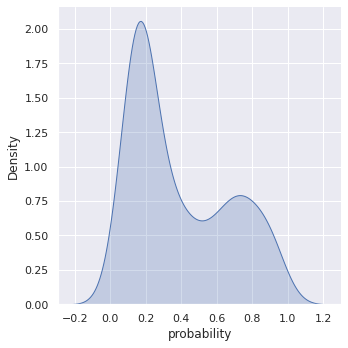

In [70]:
sns.displot(X_test, x="probability", kind="kde", fill=True)

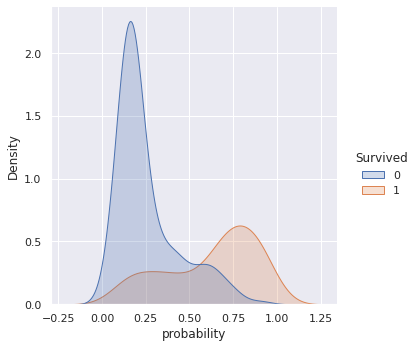

In [71]:
sns.displot(X_test, x="probability", hue = 'Survived', kind="kde", fill=True)

## Bondad de Ajuste

In [72]:
from sklearn.metrics import *

In [73]:
def plot_roc_curve(y_true, y_score, filepath=None, line_width=2, width=12,
                   height=10, title=None, colors=("#FF0000", "#000000")):
    """
    Saves a ROC curve in a file or shows it on screen.
    :param y_true: actual values of the response (list|np.array)
    :param y_score: predicted scores (list|np.array)
    :param filepath: if given, the ROC curve is saved in the desired filepath. It should point to a png file in an
    existing directory. If not specified, the curve is only shown (str)
    :param line_width: number indicating line width (float)
    :param width: number indicating the width of saved plot (float)
    :param height: number indicating the height of saved plot (float)
    :param title: if given, title to add to the top side of the plot (str)
    :param colors: color specification for ROC curve and diagonal respectively (tuple of str)
    :return: None
    """
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_score)
    gini = auc(fpr, tpr) * 2 - 1

    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(width, height))
    major_ticks = np.arange(0, 1.1, 0.1)
    minor_ticks = np.arange(0.05, 1, 0.1)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which="both", axis="both")
    ax.grid(which="minor", alpha=0.2)
    ax.grid(which="major", alpha=0.5)
    ax.tick_params(which="major", direction="out", length=5)
    plt.plot(fpr, tpr, color=colors[0], lw=line_width,
                   label="ROC curve (gini = {:.2f})".format(gini))
    plt.plot([0, 1], [0, 1], color=colors[1], lw=line_width, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel("False positive rate", fontsize=15)
    plt.ylabel("True positive rate", fontsize=15)
    if title:
        plt.title(title, fontsize=30, loc="left")
    plt.legend(loc="lower right", frameon=True, fontsize="large",
                     fancybox=True)
    plt.tight_layout()
    if filepath:
        plt.savefig(filepath, dpi=200)
        plt.close()
    else:
        plt.show()

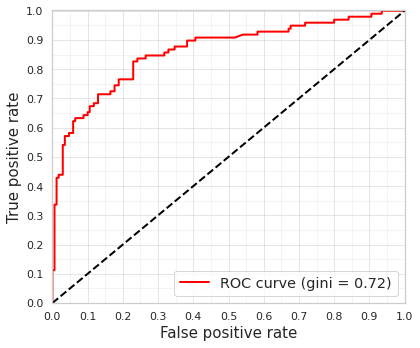

In [74]:
plot_roc_curve(y_test, X_test.probability, width=6, height=5)

In [75]:
# AUC

print('TRAIN AUC: %f' %(roc_auc_score(y_train, X_train.probability)))
print('TEST AUC: %f' %(roc_auc_score(y_test, X_test.probability)))


TRAIN AUC: 0.853816
TEST AUC: 0.862185


In [76]:
# GINI

print('TRAIN GINI: %f' %(roc_auc_score(y_train, X_train.probability)*2-1))
print('TEST GINI: %f' %(roc_auc_score(y_test, X_test.probability)*2-1))


TRAIN GINI: 0.707632
TEST GINI: 0.724370


In [77]:
# Tablas cruzadas

pd.crosstab(X_test.prediction, y_test, margins=True, margins_name="Total")

Survived,0,1,Total
prediction,,,
0,148,30,178
1,22,68,90
Total,170,98,268


In [78]:
pd.crosstab(X_test.prediction, y_test, margins=True, margins_name="Total", normalize=True)

Survived,0,1,Total
prediction,,,
0,0.552239,0.111940,0.664179
1,0.082090,0.253731,0.335821
Total,0.634328,0.365672,1.000000


In [79]:
# ACCURACY

print('TRAIN ACCURACY: %f' %(accuracy_score(y_train, X_train.prediction)))
print('TEST ACCURACY: %f' %(accuracy_score(y_test, X_test.prediction)))


TRAIN ACCURACY: 0.791332
TEST ACCURACY: 0.805970


In [80]:
# PRECISION

print('TRAIN PRECISION: %f' %(precision_score(y_train, X_train.prediction)))
print('TEST PRECISION: %f' %(precision_score(y_test, X_test.prediction)))


TRAIN PRECISION: 0.761468
TEST PRECISION: 0.755556


In [81]:
# RECALL

print('TRAIN RECALL: %f' %(recall_score(y_train, X_train.prediction)))
print('TEST RECALL: %f' %(recall_score(y_test, X_test.prediction)))


TRAIN RECALL: 0.680328
TEST RECALL: 0.693878


In [82]:
# F1

print('TRAIN F1: %f' %(f1_score(y_train, X_train.prediction)))
print('TEST F1: %f' %(f1_score(y_test, X_test.prediction)))


TRAIN F1: 0.718615
TEST F1: 0.723404


In [83]:
#Resumen de todas las métricas del modelo

metricsLogisitc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'logistic_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'logistic_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsLogisitc

,metric,logistic_train,logistic_test
0,AUC,0.853816,0.862185
1,Gini,0.707632,0.724370
2,Accuracy,0.791332,0.805970
3,Precision,0.761468,0.755556
4,Recall,0.680328,0.693878
5,F1-score,0.718615,0.723404


<h3>Análisis de Predicción</h3> 

In [84]:

from sklearn.preprocessing import KBinsDiscretizer

X_test['probability_rank'] = KBinsDiscretizer(n_bins = 6, 
                                   encode='ordinal',
                                   strategy = "uniform").fit_transform(X_test[['probability']])


In [85]:
aggregations = {'prediction':'count','probability':'max','Survived':'mean'}
res = X_test.groupby('probability_rank').agg(aggregations).reset_index()
res


,probability_rank,prediction,probability,Survived
0,0.0,110,0.196174,0.081818
1,1.0,42,0.339728,0.285714
2,2.0,27,0.502232,0.370370
3,3.0,25,0.651218,0.440000
4,4.0,36,0.805355,0.805556
5,5.0,28,0.961995,0.964286


In [86]:

pddf1 = pd.DataFrame({'probability_rank':X_test.probability_rank,
                      'value':X_test.probability,
                     'type': 'probability_mean'})

pddf2 = pd.DataFrame({'probability_rank':X_test.probability_rank,
                      'value':X_test.Survived,
                     'type': 'Survived_rate'})

pddf = pddf1.append(pddf2)
pddf

,probability_rank,value,type
172,4.0,0.745315,probability_mean
524,0.0,0.176483,probability_mean
452,2.0,0.434233,probability_mean
170,0.0,0.184873,probability_mean
620,0.0,0.139496,probability_mean
...,...,...,...
372,0.0,0.000000,Survived_rate
119,3.0,0.000000,Survived_rate
417,5.0,1.000000,Survived_rate
584,0.0,0.000000,Survived_rate


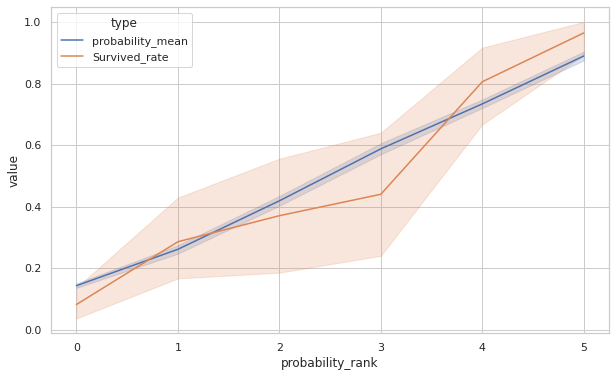

In [87]:
# Ratio del evento por tramo dela variable numérica

sns.lineplot(data=pddf.reset_index(), x="probability_rank", y="value", hue="type", markers=True, dashes=False)


## Elastic Net

In [88]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']
catFeatures = ['Pclass_num','Sex_num','Embarked_num']

X = data[numFeatures + catFeatures]
y = data.Survived


In [89]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [113]:
# Modelo
from sklearn.linear_model import LogisticRegression

eltNet = LogisticRegression(penalty = 'elasticnet',
                            class_weight = {0:y_train.mean(), 1:1},
                            solver = 'saga',
                            C = 10000000, 
                            l1_ratio = 0.5,
                            max_iter = 10000,
                            random_state = 123)

eltNet.fit(X_train, y_train)


LogisticRegression(C=10000000, class_weight={0: 0.391653290529695, 1: 1},
                   l1_ratio=0.5, max_iter=10000, penalty='elasticnet',
                   random_state=123, solver='saga')

In [114]:
# Analizando los parámetros del modelo

paramElasticNet = pd.DataFrame({'feature': numFeatures + catFeatures,
                                'parámetro': eltNet.coef_.ravel(),
                                'metod': 'elastic_net'})
paramElasticNet

,feature,parámetro,metod
0,Age_t,-0.026383,elastic_net
1,Fare_t,0.016320,elastic_net
2,SibSp_t,-0.347499,elastic_net
3,Parch_t,0.108889,elastic_net
4,Pclass_num,0.334190,elastic_net
5,Sex_num,1.202953,elastic_net
6,Embarked_num,0.148644,elastic_net


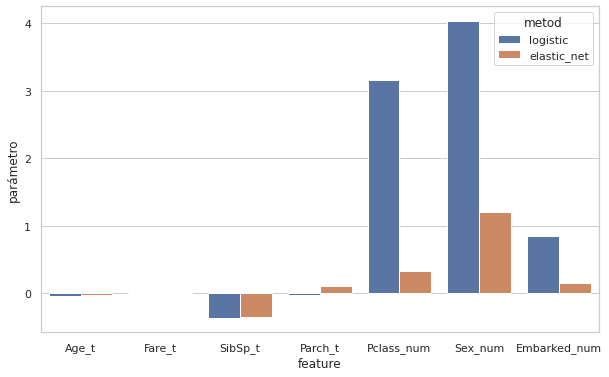

In [115]:
resumen = paramLogistic.append(paramElasticNet)

sns.barplot(x='feature', y='parámetro', hue='metod', data=resumen)


In [116]:
# Usando el modelo para predecir

X_train['probability'] = eltNet.predict_proba(X_train[numFeatures + catFeatures])[:,1]
X_test['probability']  = eltNet.predict_proba(X_test[numFeatures + catFeatures])[:,1]

X_train['prediction'] = eltNet.predict(X_train[numFeatures + catFeatures])
X_test['prediction']  = eltNet.predict(X_test[numFeatures + catFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test


In [117]:
#Resumen de todas las métricas del modelo

metricsElasticNet = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'ElasticNet_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'ElasticNet_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsElasticNet

,metric,ElasticNet_train,ElasticNet_test
0,AUC,0.822554,0.823049
1,Gini,0.645108,0.646098
2,Accuracy,0.661316,0.652985
3,Precision,0.541353,0.515337
4,Recall,0.885246,0.857143
5,F1-score,0.671851,0.643678


In [118]:
pdRes = pd.merge(metricsLogisitc, metricsElasticNet, on = 'metric', how='left')
pdRes

,metric,logistic_train,logistic_test,ElasticNet_train,ElasticNet_test
0,AUC,0.853816,0.862185,0.822554,0.823049
1,Gini,0.707632,0.724370,0.645108,0.646098
2,Accuracy,0.791332,0.805970,0.661316,0.652985
3,Precision,0.761468,0.755556,0.541353,0.515337
4,Recall,0.680328,0.693878,0.885246,0.857143
5,F1-score,0.718615,0.723404,0.671851,0.643678


## Naive Bayes

In [ ]:
# Cargar Data
import pandas as pd
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Variables 

numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']

In [ ]:
data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())

In [ ]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']

X = data[numFeatures]
y = data.Survived

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
X_train.corr()

,Age_t,Fare_t,SibSp_t,Parch_t
Age_t,1.000000,0.104797,-0.184710,-0.163742
Fare_t,0.104797,1.000000,0.167693,0.236887
SibSp_t,-0.184710,0.167693,1.000000,0.434061
Parch_t,-0.163742,0.236887,0.434061,1.000000


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)


In [ ]:
gnb.predict_proba(X_train[numFeatures])

array([[0.68313158, 0.31686842],
       [0.69047955, 0.30952045],
       [0.72529459, 0.27470541],
       ...,
       [0.7237841 , 0.2762159 ],
       [0.71873977, 0.28126023],
       [0.7167673 , 0.2832327 ]])

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = gnb.predict_proba(X_train[numFeatures])[:,1]
X_test['probability']  = gnb.predict_proba(X_test[numFeatures])[:,1]

X_train['prediction'] = gnb.predict(X_train[numFeatures])
X_test['prediction']  = gnb.predict(X_test[numFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test

In [ ]:
#Resumen de todas las métricas del modelo

metricsgnb = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'gnb_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'gnb_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsgnb     

,metric,gnb_train,gnb_test
0,AUC,0.674521,0.693097
1,Gini,0.349042,0.386194
2,Accuracy,0.685393,0.716418
3,Precision,0.744898,0.805556
4,Recall,0.299180,0.295918
5,F1-score,0.426901,0.432836


In [ ]:
pdRes = pd.merge(pdRes, metricsgnb, on = 'metric', how='left')
pdRes

,metric,logistic_train,logistic_test,ElasticNet_train,ElasticNet_test,gnb_train,gnb_test
0,AUC,0.853816,0.862185,0.761425,0.782833,0.674521,0.693097
1,Gini,0.707632,0.724370,0.522849,0.565666,0.349042,0.386194
2,Accuracy,0.791332,0.805970,0.566613,0.537313,0.685393,0.716418
3,Precision,0.761468,0.755556,0.472917,0.436893,0.744898,0.805556
4,Recall,0.680328,0.693878,0.930328,0.918367,0.299180,0.295918
5,F1-score,0.718615,0.723404,0.627072,0.592105,0.426901,0.432836


## Decision Tree

In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
data[c] = data[c].replace(np.nan,'missing')


In [ ]:

numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']

for c in catFeatures:
  data[c] = data[c].replace(np.nan,'missing')

In [ ]:
data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())


In [ ]:
# Target Encoding
from category_encoders import TargetEncoder
encoder = TargetEncoder()

data[[x + '_num' for x in catFeatures]] = encoder.fit_transform(data[catFeatures], data['Survived'])


/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  category=FutureWarning)


In [ ]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']
catFeatures = ['Pclass_num','Sex_num','Embarked_num']

X = data[numFeatures + catFeatures]
y = data.Survived

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
# Configuramos el modelo

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 5,
                               min_samples_leaf = int(round(y_train.shape[0]*0.05,0)),
                               class_weight = {0:y_train.mean(),1:1},
                               random_state = 123)
dtree = dtree.fit(X_train, y_train)
    
dtree

DecisionTreeClassifier(class_weight={0: 0.391653290529695, 1: 1}, max_depth=5,
                       min_samples_leaf=31, random_state=123)

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = numFeatures + catFeatures,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[numFeatures + catFeatures])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[numFeatures + catFeatures])[:,1]

X_train['prediction'] = dtree.predict(X_train[numFeatures + catFeatures])
X_test['prediction']  = dtree.predict(X_test[numFeatures + catFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test

In [ ]:
#Resumen de todas las métricas del modelo

metricsDtree = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree                                 

In [ ]:
pd.merge(metricsLogisitc, metricsDtree, on = 'metric', how='left')

### Gracias por completar este laboratorio!

---

